#  2020-09-24

## Calibrating images

Calibration steps

1. Reduce and combine bias images
2. Reduce and combine dark images
3. Reduce and combine flat images
4. Reduce science images

Reduce ↔ Calibrate

Reduction ↔ Calibration

## Calibration setup on server

1. Make a new folder in your `jupyter-yourname` foldeare to hold the calibrated data. Name the folder  year-month-day like the lecture notes.
2. Copy the notebook the file `reduction-template.ipynb` into your new folder.
3. Rename the file you just copied.
4. Open the notebook.
5. Run the code using the settings outlined below.


In [1]:
from IPython.display import YouTubeVideo

### Data calibration overview, led by class

VIdeo link: https://youtu.be/u1eAHipnS7c

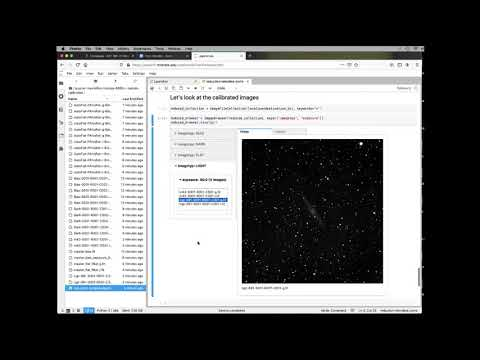

In [3]:
YouTubeVideo('u1eAHipnS7c')

### Data calibration overview, by instructor

Video link: https://youtu.be/WZDAsY6KINc

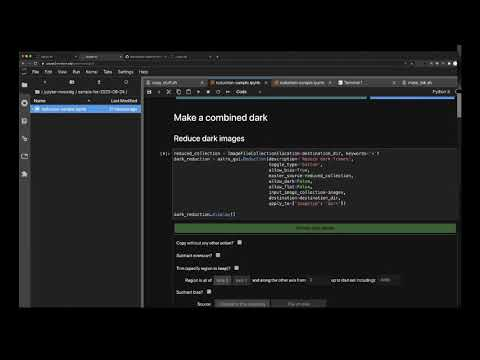

In [4]:
YouTubeVideo('WZDAsY6KINc')

### Calibrating and combining bias images

1. Remove (trim) overscan region (upper limit is 4096)
2. Optionally, subtract overscan (but **not** for our camera)
3. Combine images
    + Average the bias images
        - Do *not* scale before combining
    + Eliminate outlying values by doing sigma clipping, set min and max to 5
    + Do not `group by` anything 

### Calibrating and combining dark images

1. Trim overscan region (upper limit 4096)
2. Optionally, subtract overscan (but **not** for our camera)
3. Subtract the **combined** bias image from each dark image
4. Combine dark images 
    + Average the dark images
        - Do *not* scale before combining
    + Use sigma clipping to exclude extreme values, min and max of 5
    + Group by exposure times

### Calibrating and combining flat images

Twilight flats each have a different exposure time, and small differences in average pixel counts.

1. Trim overscan region, max is 4096
2. Optionally, subtract overscan (but **not** for our camera)
3. Subtract **combined** bias from each flat
4. Subtract **combined** dark from each flat image, scale the exposure time of the combined dark to match flat image
5. Combine the flat images
    + Sigma clip, min and max of 5
    + Average the flat images together
        - Scale so that their *median* all have same value (1)
    + Group by filter *only*

### Calibrating science images

1. Trim overscan region, max 4096
2. Optionally, subtract overscan (but not for our camera)
3. Subtract **combined** bias from each science image
4. Subtract **combined** dark from each science image, scale the exposure time of the combined dark to match science image
5. Divide each science image by the **combined** flat for that image's filter (i.e. Flat correct)

## Time scales in astronomy

### Video of discussion 

video link: https://youtu.be/k-kYLBReseU

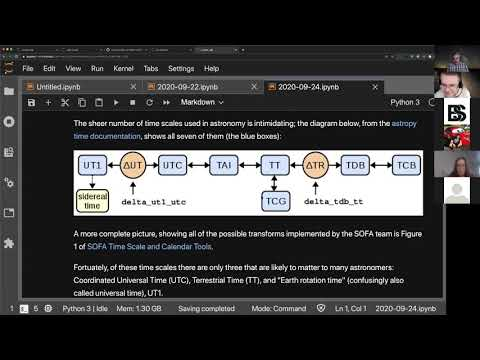

In [2]:
YouTubeVideo('k-kYLBReseU')

The formal definition of these scales are maintained by the International Astronomical Union [Standards of Fundamental Astronomy](http://www.iausofa.org/) (SOFA). The document [SOFA Time Scale and Calendar Tools](http://www.iausofa.org/sofa_ts_c.pdf), sections 2 and 3 are particularly helpful if you want a brief, high-level summary of the time scales, and this overview draws heavily on them.

The worked examples use [astropy](https://astropy.org) for the calculations, and some of the images below are from the [astropy time documentation](http://astropy.readthedocs.io/en/stable/time/index.html).

Note that astropy itself uses a lightly modified version of the official SOFA implementations of the time transforms (the modified version is called ERFA, and the primary difference between it and the official SOFA code is the license under which it is distributed).

### Big (but a little confusing) picture

The sheer number of time scales used in astronomy is intimidating; the diagram below, from the [astropy time documentation](http://astropy.readthedocs.io/en/stable/time/index.html), shows all seven of them (the blue boxes):

![Time scales and relationships](https://github.com/astropy/astropy/raw/master/docs/time/time_scale_conversion.png)

A more complete picture, showing all of the possible transforms implemented by the SOFA team is Figure 1 of [SOFA Time Scale and Calendar Tools](http://www.iausofa.org/sofa_ts_c.pdf).


Fortuately, of these time scales there are only three that are likely to matter to many astronomers: Coordinated Universal Time (UTC), Terrestrial Time (TT), and "Earth rotation time" (confusingly also called universal time), UT1.

International Atomic Time (TAI) will also be discussed briefly below because it and TT are virtually the same (that does *NOT* imply they are interchangable).

For completeness, because they won't be discussed further, Geocentric Coordinate Time (TCG) and Barycentric Coordinate Time (TCB) are time scales carefully defined in particular reference frames in the context of general relativity that are convenient for theoretical calculations. Unless you are doing work that requires accuracy to the nearest nanosecond you do not need to worry about them.

Though Barycentric Dynamical Time (TDB) is formally derived from TCB it is, for these purposes, very close to Terrestrial Time (TT).

### Essential time scales

#### International Atomic Time (TAI) is the official time standard of the planet

Beginning in the 1980s the formal definition of a second was changed to specific number of periodds of the radiation produced in a specific transitition in a specific isotope of cesium under specific environment conditions.

A day is defined to be exactly 86,400 seconds. 

This time scale is conceptually very simple even though the inner workings of an atomic clock are not. An atomic clock is essentially like a clock in a house except that it runs at an extraordinary steady rate. Two identically prepared clocks started now will differ by less than a second a million years from now. In practice, it is an average of the time on a couple of hundred atomic clocks around the world that is used as TAI.

#### Earth rotation time (UT1) used to be the official time standard, and it is used to calculate sidereal time

Until the advent of atomic clocks, the official "clock" for thousands of years had been the motion of the Earth.

This seems at first like a conceptually simple standard. As a first try, one might define a day as the time interval between two successive observations of the Sun as it crosses the meridian (i.e. the time interval between two successive "highest point in sky" or even two successive sunrises or sunsets). A year could be defined as the time interval between two successive crossings of the Sun over the Earth's equator moving south to north. 

In this scale, a second is defined to be 1/86400 of one day.

It turns out that a day defined this way varies in length over the course of the year (because the Earth's orbit is slightly elliptical, so the speed of the Earth in its orbit varies slightly), and a day defined this way gets longer with time because the rotation rate of the Earth is gradually slowing. In addition, the gravitational pull of the Moon and Sun cause changes in the direction of axis of rotation, which affect both the lengths of days and years.

**You still need to be aware of UT1 because it is essentially a measure of Eath's orientation in space, and your telescope is attached to the Earth.**

You shouldn't normally need to calculate UT1 yourself, but certainly the computer that points your telescope needs to!

#### UTC (Coordinated Universal Time) is (almost) what your computer displays and what is most likely recorded in your image headers

It runs at the same rate at TAI, but *leap seconds* are added occasionally so that the difference between UTC and UT1 is never larger than 0.9 seconds.

This a compromise between the advantages of an atomic lock (very steady rate) and the convenience of having your clock time remain closely tied to the motions of the sun, at the expense of occasional leap seconds.

UTC behaves oddly at a leap second; in most cases the clock simply pauses for one second.

One way to think about this leap second is that most days in UTC are exactly 86,400 seconds, like in atomic time, but once every 18-24 months one day is 86401 seconds long (and even less frequently a UTC day is 86,399 seconds long, a negative leap second).

The interval between leap seconds is not random but is also not precisely predicatable because it depends on the rate at which the Eath's rotation rate is changing. It is possible to very precisely *measure* that rate, but not to predict it with high enough precision to plan leap seconds more than about 6 months in advance.

Computers typically add an offset for your time zone, so the time displayed on the computer is typically UTC adjusted for the local time zone. For example, Central Standard Time, which covers the central United States, is UTC - 6 hours, and CDT is UTC- 5 hours.


### Terrestrial Time (TT) is atomic time with an offset

Its main practical use is in the ephemerides provided for solar system objects by NASA, which are used to accurately calculate the positions of solar system bodies.

The relationship to atomic time really is very simple; terrestrial time is simply atomic time plus a constant number of seconds, and that constant never changes. Its value is deliberately omitted here to avoid any temptation the reader might have to start writing her own code to carry out time transforms. Though this one case is simple, the rest are not.

### Time formats


There are several formats for representing times. For example, "June 30, 1994 11:59:59PM" and "1994-06-30 23:59:59" are both ways of writing the same time. A good list of commont formats is in the [astropy documentation for time formats](http://astropy.readthedocs.io/en/stable/time/index.html#time-format).

One common format, ISOT, is this: `1994-06-30T23:59:59`

Note that the order of items in the date is always YEAR-MONTH-DAY, that month and day are always two digits, and that the time is on a 24-clock.

### Julian Date and Modified Julian Date

Julian date is the number of days that have elapsed since noon on a particular day about 7,000 years ago. Times are included as a fraction of a day. 

Different time scales (like UT1 and TAI) have days that correspond to diferent amounts of time, so when a Julian date is used it should be made clear what time scale it is on.

One important time scale, UTC, should NOT be converted directly to a Julian date because the number of seconds in a day in UTC depends on the day. Most days it is 86,400 but the is one second longer or shorter on UTC leap second days.

The easiest way to avoid that kind of error if you have a time in UTC and want that time as a Julian Date is to convert it to another scale, like TAI or TT first, then express it as a Julian date.

To repeat, **do not express a time on the UTC scale as a Julian date**. Convert to a different scale first, then be explicit about which time scale you are using when you wwrite a Julian date.

#### Modified Julian date

The JD has a couple of oddities:

+ The day starts at noon, not midnight.
+ There have been over 2.4 million days since the designated start of the Julian date system, so it is easy to unintentionally round a Julian date when it is represented in a computer.

The modified Julian date (MJD) is the Julian data minus 2,400,000.5. The decimal part shifts the MJD to begin at midnight instead of noon, and subtracting off 2.4 million makes it easier to represent the date on a computer.

As with the JD, one should clearly indicate the time scale used when  providing a MJD, and UTC is **not** an approporiate time scale.

### Software for converting between time scales and formats

The example below illustrate using [astropy](http://astropy.org) to do time conversions. Very detailed documentation for astropy's `Time` class is [here](), but you may find it overwhelming if you are new to python.

The examples below walk through some of the basic uses.

Depending on your needs even this may be too much; if all you want to know is the sidereal time right now to within a second or so, just google it.

### How to run these code examples

You can simply read this notebook without running any of the code. If you want to try the code, feel free to modify the cells and run them.

The program in each cell can be run by:

+ Clicking in the cell with the mouse, then
+ Holding down the shift key and pushing `Enter`.

Interspersed with the code below are several exercises. Give them a try!

#### *Run ALL the cells in order if you choose to run any of them*

In [1]:
# Load Time from astropy 
from astropy.time import Time

#### Create a time

To create a time you need to supply three things:

+ The time itself.
+ The scale the time is in (a UTC day is not the same length as a UT1 day, nor is it alwys the same length as a TAI/TT day).
+ The format the time is in.

If you leave out the last two, astropy will try to guess the scale and format. Try to avoid that by being explicit. That is usually fine for the *format* but you should always *explicitly set the scale*.

The example below creates a variable named `my_time` that holds the time September 15, 2016 at 9:36AM Central Daylight Time.

Notice that the convertion to UTC has been done manually by adding 5 hours to the current time.

In [2]:
my_time = Time("2016-09-15 14:36:00", scale='utc')

#### Display the time you created

Creating a variable to hold a time does not automatically print in on the screen. To display it, use the print command, like this:

In [3]:
print(my_time)

2016-09-15 14:36:00.000


#### Convert a time to a different time scale

The list of time scales that astropy can represent is listed in [their documentation](); it includes all of the scales in the diagram at the top of this notebook.

Converting between time scales is very straightforward: add a period and the abbreviation for that time scale in lower case (e.g.tai for Atomic Time International). 

In [4]:
print(my_time.tai)

2016-09-15 14:36:36.000


#### Some time scales will take longer to compute the first time you do them

UT1, for example, requires downloading a large table of Earth orientation information the first time you use it. Be patient.

In [5]:
print(my_time.ut1)

2016-09-15 14:35:59.741


#### Changing the format

Changing the format is also straightforward; add the abbreviation for the format you want ([listed here](http://astropy.readthedocs.io/en/stable/time/index.html#time-format)) to the end of the variable name.

In [6]:
print("Time in ISOT format:", my_time.isot)
print("Time in Julian Year format:", my_time.jyear)

Time in ISOT format: 2016-09-15T14:36:00.000
Time in Julian Year format: 2016.706662103582


#### Changing the format and scale

Both the format and the scale can be changed by combining the previous two operations, but the scale change must come before the format change, like this:

In [7]:
print(my_time.tdb.jd)

2457647.1091224817


### Wait, no time zone support?

Very briefly, no. This matters far less than might be expected because the times of interest are usually extracted from the header of a FITS file, in the UTC scale, in the ISOT format (or something close to it).

A much longer but more complicated answer is yes; read [this documentation](http://astropy.readthedocs.io/en/stable/time/index.html#timezones) for details.

#### Sidereal Time

Sidereal time is the right ascension of an object crossing the meridian at a specific time and longitude on the earth. Though it is really an angle, it is always expressed as a time.

The two types of sidereal time, mean and apparent, essentially refer to whether variations in the length of a day due to the ellipticity of the Earth's orbit (and other, smaller, effects) are taken into account.

In [8]:
print(my_time.sidereal_time('mean', longitude=360-96))

7h51m56.7709s


#### Julian Date and UTC do not mix

Julian Date is a time format that is a little special: UTC times cannot sensibly be represented as Julian dates because not all UTC days have the same length.

Unfortunately, astropy will give you a UTC in JD if you ask:

In [9]:
print(my_time.jd)

2457647.1083333334


### Convert to TT or TAI (or TDB) and THEN calculate the julian date...

#### ...and specify the time scale chosen when you communicate your data!

In [10]:
print(my_time.tt.jd)

2457647.1091225
